In [1]:
"""
Calculate the WKB approximation for the power law case of the axion relic density.
"""

'\nCalculate the WKB approximation for the power law case of the axion relic density.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
from constants import *

In [3]:
N = 200

In [4]:
# model paramter
m_a_linear = np.logspace(-24, -12, N) # [eV]
phi_i_linear = 1e9 * np.logspace(13, 18, N) # [eV]
m_a, phi_i = np.meshgrid(m_a_linear, phi_i_linear)

$$
z_\mathrm{eq} = \frac{\rho_c \Omega_m(t_0)}{\rho_\gamma(t_0)} - 1
\Rightarrow 
\Omega_\gamma = \frac{\rho_\gamma}{\rho_c} = \frac{\Omega_m}{z_\mathrm{eq} + 1}
$$

In [5]:
# compute the axion relic density parameter
Omega_a = 1/6 * (9*Omega_rad)**(3/4) * (m_a / H0)**(1/2) * (phi_i / M_pl)**2

In [6]:
Omega_a[Omega_a*h**2 > Omega_DM_h_sq] = 0

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


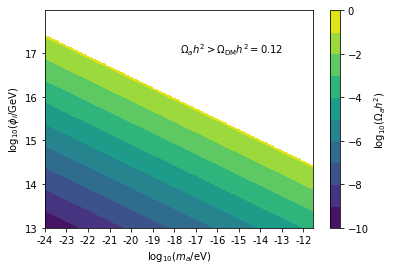

In [7]:
# plot
# plt.figure(figsize=(10,8))
#plt.pcolormesh(np.log10(Omega_a * h**2))
plt.contourf(np.log10(Omega_a * h**2), 10)
plt.xticks(range(0, m_a_linear.size, m_a_linear.size // 12), map(str, range(-24, -12 + 1)))
plt.yticks(range(0, phi_i_linear.size, phi_i_linear.size // 5), map(str, range(13, 18 + 1)))
plt.xlabel(r"$\log_{10}(m_a / \mathrm{eV})$")
plt.ylabel(r"$\log_{10}(\phi_i / \mathrm{GeV})$")
plt.text(2 * N / 4, 4 * N / 5, r"$\Omega_a h^2 > \Omega_\mathrm{DM} h^2 = 0.12$")
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$\log_{10}(\Omega_a h^2)$")
plt.show()